[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Madhavan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Sample text: you know something , christmas is not about presents . it ' s about over - hyped holiday films with lots of merchandising and product tie - ins . at least that would seem to be the message of " the gr
Label: 0


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.5094 - loss: 0.6932 - val_accuracy: 0.5250 - val_loss: 0.6919
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.5619 - loss: 0.6881 - val_accuracy: 0.5500 - val_loss: 0.6893
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.6769 - loss: 0.6501 - val_accuracy: 0.5750 - val_loss: 0.6797
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7944 - loss: 0.5098 - val_accuracy: 0.5700 - val_loss: 0.7482
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8844 - loss: 0.3397 - val_accuracy: 0.5350 - val_loss: 0.8294
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9294 - loss: 0.2246 - val_accuracy: 0.5675 - val_loss: 1.0068
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9656 - loss: 0.1271 - val_accuracy: 0.5425 - val_loss: 1.2978
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9688 - loss: 0.1034 - val_accuracy: 0.

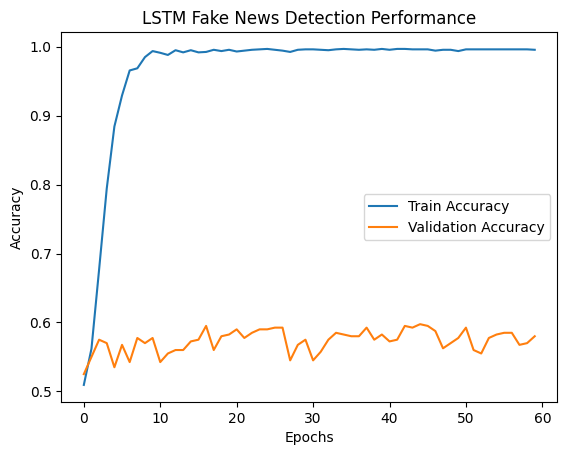

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
⚠️ Fake News
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
⚠️ Fake News


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import movie_reviews
import random

# Download dataset automatically
nltk.download('movie_reviews')

# Load data
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle dataset
random.shuffle(documents)

texts = [" ".join(words) for words, label in documents]
labels = [1 if label == 'pos' else 0 for words, label in documents]

print("Sample text:", texts[0][:200])
print("Label:", labels[0])
vocab_size = 5000
maxlen = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

X = np.array(padded)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(vocab_size, 64, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=60, batch_size=64,
                    validation_data=(X_test, y_test))
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Fake News Detection Performance')
plt.show()

def predict_news(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')
    pred = model.predict(padded_seq)[0][0]
    if pred > 0.5:
        print("📰 Real News")
    else:
        print("⚠️ Fake News")

# Example test
predict_news("Government announces new education policy with major reforms")
predict_news("Aliens landed in the White House garden yesterday")

